In [12]:
import torch
import torch.nn as nn # module, basic building blocks for graphs https://docs.pytorch.org/docs/stable/nn.html#module-torch.nn
# The torch.nn module is the collection that includes various pre-defined layers, activation functions,
# loss functions, and utilities for building and training the Neural Networks.

import torch.nn.functional as F # module that works directly on the input data; they perform direct operations like convolution, activation,
# The torch.nn.functional includes a functional approach to work on the input data.
# It means that the functions of the torch.nn.functional module work directly on the input data, without creating an instance of a neural network layer.

# You should use the ‘torch.nn’ when you want to train the layers with learnable parameters.
# But if you want to make operations simple, ‘torch.nn.functional’ is suitable as it has stateless operations without any parameters.

# If you want to create and train the neural network using the pre-defined layers, torch.nn is suitable.
# But if you want to customize some parts of the neural network, you can use the torch.nn.functional within the custom modules.

# more info:
# https://www.geeksforgeeks.org/deep-learning/differences-between-torch-nn-and-torch-nn-functional/

import numpy as np
import random
import matplotlib.pyplot as plt


In [13]:
# Define a simple Feedforward Neural Network (FNN) architecture
# subclass of nn.Module: Base class for all neural network modules. Your models should also subclass this class.
# https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module
class SimpleFNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        """
        Initializes a simple FNN with two hidden layers.

        Args:
            input_size (int): Number of input features.
            hidden_size1 (int): Number of neurons in the first hidden layer.
            hidden_size2 (int): Number of neurons in the second hidden layer.
            output_size (int): Number of output neurons.
        """
        #super(SimpleFNN, self).__init__()
        super().__init__()

        # https://docs.pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
        # Applies an affine linear transformation to the incoming data: y = xAT + by.
        # Linear initializes randomly the weights and bias.

        # to controlling sources of randomness
        # https://docs.pytorch.org/docs/stable/notes/randomness.html
        torch.manual_seed(0)
        torch.use_deterministic_algorithms(True)
        random.seed(0)
        np.random.seed(0)

        # interesting blog about Neural Networks, Manifolds, and Topology:
        # http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/
        self.input_to_hidden_layer1         = nn.Linear(input_size, hidden_size1)   # Input layer to Hidden layer 1 (A*x+b)
        self.hidden_layer1_to_hidden_layer2 = nn.Linear(hidden_size1, hidden_size2) # Hidden layer 1 to Hidden layer 2 (A*x+b)
        self.hidden_layer2_to_output        = nn.Linear(hidden_size2, output_size)  # Hidden layer 2 to Output layer (A*x+b)

        # details about weights initialization:
        # https://medium.com/@whyamit101/how-do-i-initialize-weights-in-pytorch-1dd37078d19b
        #torch.nn.init.xavier_uniform_(self.input_to_hidden_layer1.weight)
        #torch.nn.init.kaiming_normal_(self.input_to_hidden_layer1.weight, mode='fan_in', nonlinearity='relu')

        print(f"SimpleFNN initialized with:")
        print(f"  Input features: {input_size}")
        print(f"  Hidden Layer 1 neurons: {hidden_size1}")
        print(f"  Hidden Layer 2 neurons: {hidden_size2}")
        print(f"  Output neurons: {output_size}")

    def forward(self, x):
        # Define the computation performed at every call.
        # Should be overridden by all subclasses. (as done here)
        """
        Defines the forward pass of the network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor of the network.
        """

        x = F.relu(self.input_to_hidden_layer1(x))          # Activation function for hidden layer 1 (from input)
        x = F.relu(self.hidden_layer1_to_hidden_layer2(x))  # Activation function for hidden layer 2 (from hidden layer 1)
        #x = F.sigmoid( self.hidden_layer2_to_output(x))                 # Linear activation for output layer (common for regression)
        x = self.hidden_layer2_to_output(x)
        return x

--- Defining a Simple FNN Architecture in PyTorch ---
--- Instantiating the SimpleFNN model ---
SimpleFNN initialized with:
  Input features: 2
  Hidden Layer 1 neurons: 5
  Hidden Layer 2 neurons: 7
  Output neurons: 1
--- Model Structure:
SimpleFNN(
  (input_to_hidden_layer1): Linear(in_features=2, out_features=5, bias=True)
  (hidden_layer1_to_hidden_layer2): Linear(in_features=5, out_features=7, bias=True)
  (hidden_layer2_to_output): Linear(in_features=7, out_features=1, bias=True)
)
Linear(in_features=2, out_features=5, bias=True)
Parameter containing:
tensor([[-0.0053,  0.3793],
        [-0.5820, -0.5204],
        [-0.2723,  0.1896],
        [-0.0140,  0.5607],
        [-0.0628,  0.1871]], requires_grad=True)
Parameter containing:
tensor([-0.2137, -0.1390, -0.6755, -0.4683, -0.2915], requires_grad=True)
--- Weights visualization:


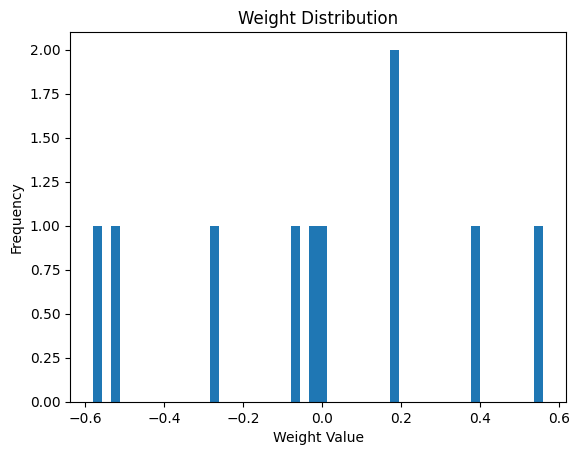

In [14]:
print("--- Defining a Simple FNN Architecture in PyTorch ---")
input_features = 2
hidden_neurons1 = 5 # Number of neurons in the first hidden layer
hidden_neurons2 = 7 # Number of neurons in the second hidden layer
output_values = 1    # Predicting a single value

print("--- Instantiating the SimpleFNN model ---")
model = SimpleFNN(input_size=input_features,
                  hidden_size1=hidden_neurons1,
                  hidden_size2=hidden_neurons2,
                  output_size=output_values)

print("--- Model Structure:")
print(model)
print(model.input_to_hidden_layer1)
print(model.input_to_hidden_layer1.weight)
print(model.input_to_hidden_layer1.bias)

print("--- Weights visualization:")
# Convert weights to a NumPy array
weights = model.input_to_hidden_layer1.weight.detach().numpy()

# Visualize the weight distribution
plt.hist(weights.flatten(), bins=50)
plt.title("Weight Distribution")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.show()

In [15]:
# Create a dummy input tensor to test the forward pass
# Batch size of n, m input features
number_samples = 5
torch.manual_seed(0)
dummy_input = torch.randn(number_samples, input_features)
print("Dummy input tensor ("+str(number_samples)+" samples, "+str(input_features)+" features):")
print(dummy_input)

# Perform a forward pass (conceptual, model is not trained yet)
print("Performing a conceptual forward pass with the untrained model...")
with torch.no_grad(): # We don't need to calculate gradients for this conceptual pass
  #dummy_output = model(dummy_input)
  dummy_output = model.forward(dummy_input) # dummy_input = x0

print("Output from the untrained model (for the dummy input):")
print(dummy_output)

Dummy input tensor (5 samples, 2 features):
tensor([[ 1.5410, -0.2934],
        [-2.1788,  0.5684],
        [-1.0845, -1.3986],
        [ 0.4033,  0.8380],
        [-0.7193, -0.4033]])
Performing a conceptual forward pass with the untrained model...
Output from the untrained model (for the dummy input):
tensor([[ 0.0380],
        [-0.1040],
        [-0.1660],
        [ 0.0200],
        [-0.0450]])
